In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [18]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [42]:
sql_input = "SELECT * FROM Sensor2"
value = pd.read_sql_query(sql_input, conn)
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-01-30 02:56:11,TGS2600,0.972982228,2024-01-30 02:56:11
2024-01-30 02:56:11,TGS2602,0.962797165,2024-01-30 02:56:11
2024-01-30 02:56:12,TGS2603,0.959462583,2024-01-30 02:56:12
2024-01-30 02:56:13,TGS2610,0.961129963,2024-01-30 02:56:13
2024-01-30 02:56:14,TGS2620,0.061362244,2024-01-30 02:56:14
...,...,...,...
2024-01-30 03:08:33,TGS2603,1.047312856,2024-01-30 03:08:33
2024-01-30 03:08:35,TGS2610,1.054142475,2024-01-30 03:08:35
2024-01-30 03:08:35,TGS2620,0.061362244,2024-01-30 03:08:35


In [43]:
sensor_dict = {}
for sensor, group in value.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'MQ2':                            Value                Time
 Time                                                
 2024-01-30 02:56:14  1.364670157 2024-01-30 02:56:14
 2024-01-30 02:56:23  0.682335079 2024-01-30 02:56:23
 2024-01-30 02:56:30  0.682335079 2024-01-30 02:56:30
 2024-01-30 02:56:39  0.409401059 2024-01-30 02:56:39
 2024-01-30 02:56:52  0.682335079 2024-01-30 02:56:52
 ...                          ...                 ...
 2024-01-30 03:07:59  0.409401059 2024-01-30 03:07:59
 2024-01-30 03:08:06  0.409401059 2024-01-30 03:08:06
 2024-01-30 03:08:14  1.364670157 2024-01-30 03:08:14
 2024-01-30 03:08:23  0.818802118 2024-01-30 03:08:23
 2024-01-30 03:08:36  0.545868099 2024-01-30 03:08:36
 
 [67 rows x 2 columns],
 'MQ3':                            Value                Time
 Time                                                
 2024-01-30 02:56:16  0.980926394 2024-01-30 02:56:16
 2024-01-30 02:56:24  0.653950930 2024-01-30 02:56:24
 2024-01-30 02:56:30  0.817438662 2024-01-

In [44]:
Title = ['MQ2','MQ3','MQ4','MQ5','MQ6','MQ7','MQ8','MQ9','TGS2600','TGS2602','TGS2603','TGS2610','TGS2620']

In [45]:
sensor_dict.items()

dict_items([('MQ2',                            Value                Time
Time                                                
2024-01-30 02:56:14  1.364670157 2024-01-30 02:56:14
2024-01-30 02:56:23  0.682335079 2024-01-30 02:56:23
2024-01-30 02:56:30  0.682335079 2024-01-30 02:56:30
2024-01-30 02:56:39  0.409401059 2024-01-30 02:56:39
2024-01-30 02:56:52  0.682335079 2024-01-30 02:56:52
...                          ...                 ...
2024-01-30 03:07:59  0.409401059 2024-01-30 03:07:59
2024-01-30 03:08:06  0.409401059 2024-01-30 03:08:06
2024-01-30 03:08:14  1.364670157 2024-01-30 03:08:14
2024-01-30 03:08:23  0.818802118 2024-01-30 03:08:23
2024-01-30 03:08:36  0.545868099 2024-01-30 03:08:36

[67 rows x 2 columns]), ('MQ3',                            Value                Time
Time                                                
2024-01-30 02:56:16  0.980926394 2024-01-30 02:56:16
2024-01-30 02:56:24  0.653950930 2024-01-30 02:56:24
2024-01-30 02:56:30  0.817438662 2024-01-30 02

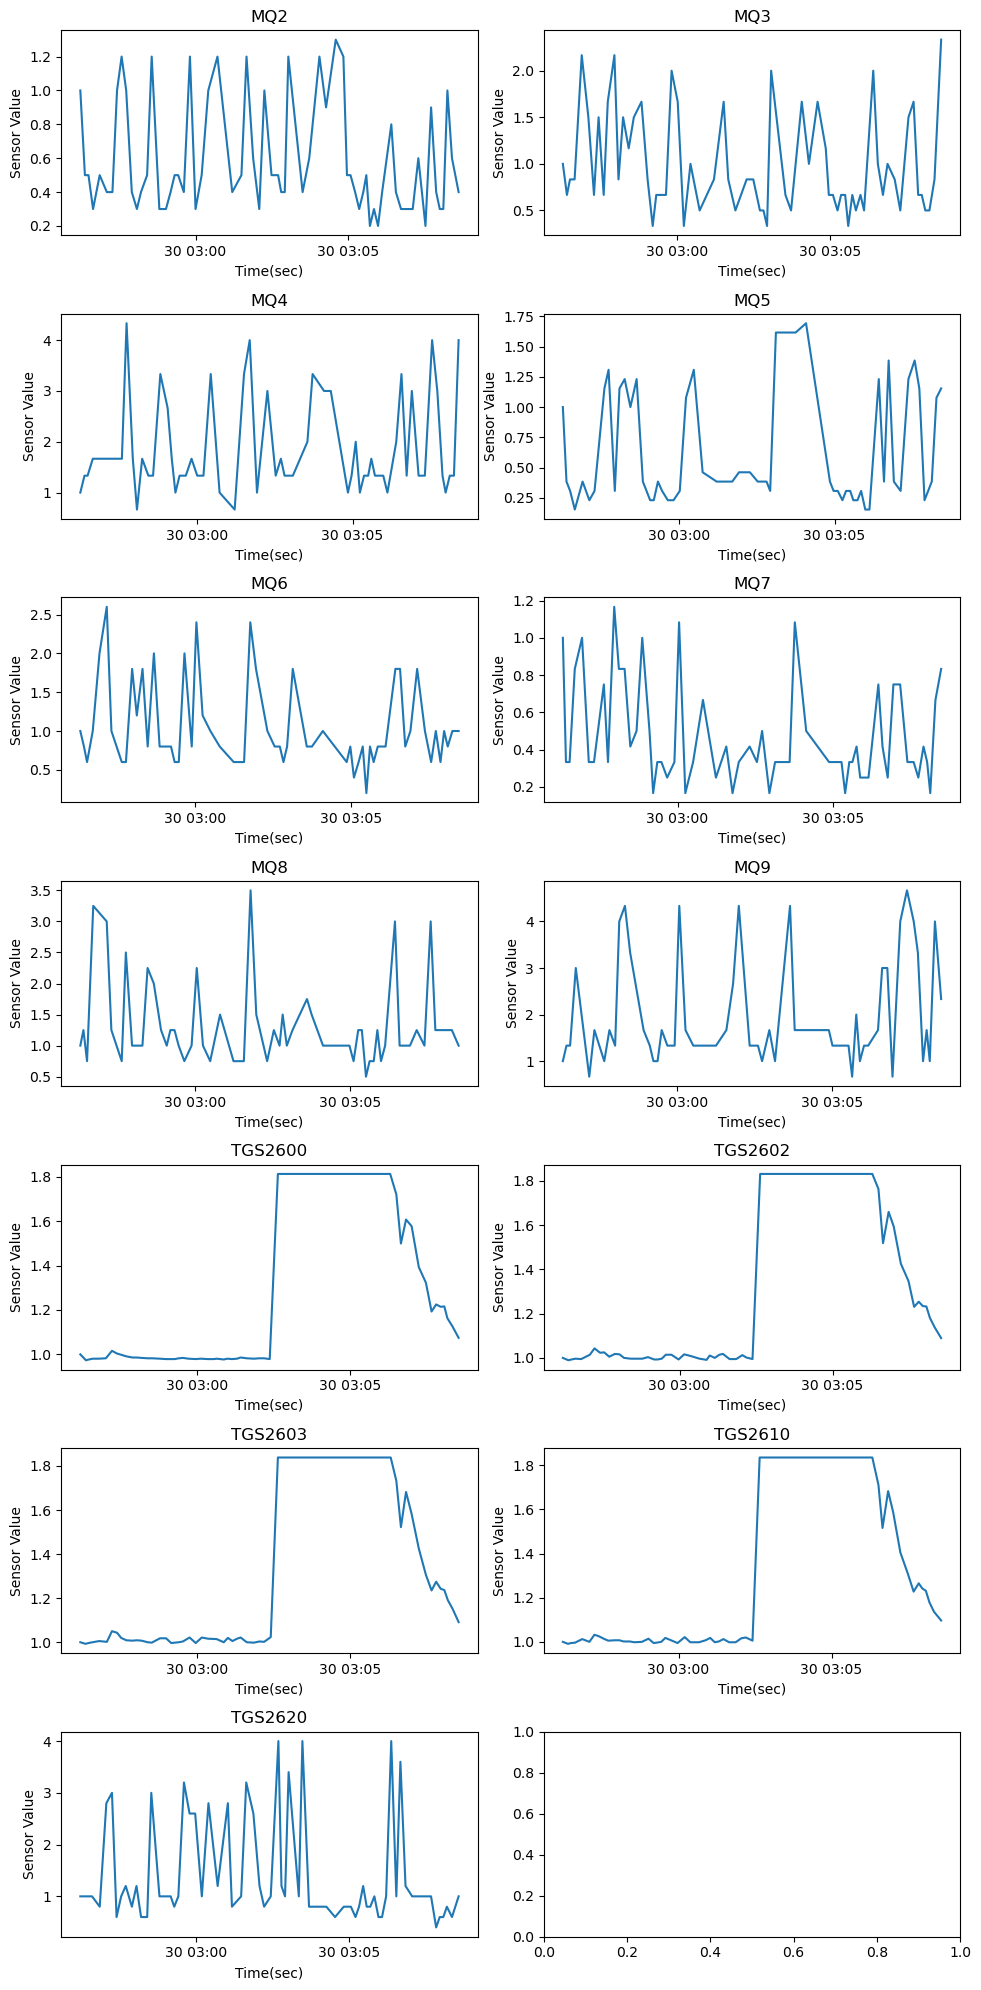

In [46]:
fig, axes = plt.subplots(nrows=(len(sensor_dict)//2)+1, ncols = 2, figsize=(10,20))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()